In [2]:
import numpy as np
from time import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import pdspy.modeling as modeling
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.animation import FuncAnimation
import os
import pickle

In [3]:
directory = "/net/jax/export/home/jax/Documents/Projects/SEDModeling/Grid"
directory="../grid/models"
indices=[]
incl=[]
for j in range(len(os.listdir(directory))):
    if j%200==0:
        print(str(j))
    i=0 
    if os.listdir(directory)[j][-5:]==".hdf5":
        Tval=float(os.listdir(directory)[j].split("_")[(2*i)+1])
        if Tval<100:
            print (os.listdir(directory)[j])
            indices.append(j)
            incl.append(float(os.listdir(directory)[j].split("_")[(2*14)+1][:-5]))

0
Tstar_34.314_logLstar_-0.339_logMdisk_-5.367_logRdisk_0.844_h0_0.093_logRin_0.107_gamma_0.547_beta_1.200_logMenv_-7.307_logRenv_3.826_fcav_0.229_ksi_1.006_logamax_4.437_p_2.812_incl_42.673.hdf5
Tstar_43.479_logLstar_2.632_logMdisk_-3.052_logRdisk_2.011_h0_0.277_logRin_1.856_gamma_1.377_beta_1.510_logMenv_-5.797_logRenv_3.172_fcav_0.805_ksi_0.999_logamax_0.313_p_2.562_incl_83.784.hdf5
Tstar_31.334_logLstar_2.555_logMdisk_-5.277_logRdisk_1.931_h0_0.411_logRin_0.474_gamma_0.955_beta_1.996_logMenv_-3.104_logRenv_2.549_fcav_0.2_ksi_1.284_logamax_3.836_p_2.879_incl_34.233.hdf5
Tstar_30.133_logLstar_2.027_logMdisk_-2.586_logRdisk_2.460_h0_0.399_logRin_1.283_gamma_0.113_beta_1.899_logMenv_-2.596_logRenv_3.894_fcav_0.293_ksi_0.542_logamax_3.601_p_3.639_incl_83.410.hdf5
Tstar_34.837_logLstar_0.851_logMdisk_-6.583_logRdisk_1.789_h0_0.236_logRin_-0.175_gamma_1.4_beta_1.675_logMenv_-2.689_logRenv_3.500_fcav_0.959_ksi_0.910_logamax_2.556_p_3.271_incl_50.636.hdf5
200
Tstar_41.365_logLstar_0.202_log

Tstar_38.980_logLstar_-0.739_logMdisk_-2.009_logRdisk_2.870_h0_0.352_logRin_0.941_gamma_0.962_beta_0.977_logMenv_-3.943_logRenv_3.640_fcav_0.351_ksi_1.442_logamax_3.380_p_4.392_incl_41.551.hdf5
1200
Tstar_33.379_logLstar_-0.242_logMdisk_-2.235_logRdisk_1.670_h0_0.471_logRin_0.621_gamma_0.471_beta_0.902_logMenv_-4.064_logRenv_3.110_fcav_0.171_ksi_0.526_logamax_2.804_p_3.813_incl_53.848.hdf5
Tstar_48.350_logLstar_-0.563_logMdisk_-3.036_logRdisk_1.9_h0_0.084_logRin_1.708_gamma_1.718_beta_0.552_logMenv_-2.591_logRenv_3.704_fcav_0.614_ksi_1.289_logamax_4.693_p_3.854_incl_44.028.hdf5
Tstar_31.359_logLstar_2.910_logMdisk_-5.538_logRdisk_1.516_h0_0.442_logRin_-0.116_gamma_1.306_beta_1.232_logMenv_-7.257_logRenv_3.933_fcav_0.506_ksi_1.446_logamax_3.436_p_2.710_incl_26.2.hdf5
Tstar_43.412_logLstar_1.6_logMdisk_-6.024_logRdisk_0.846_h0_0.112_logRin_-0.709_gamma_0.390_beta_1.622_logMenv_-7.063_logRenv_3.373_fcav_0.440_ksi_0.604_logamax_0.326_p_4.141_incl_25.585.hdf5
Tstar_37.5_logLstar_2.642_logMd

Tstar_35.412_logLstar_-0.979_logMdisk_-6.484_logRdisk_1.202_h0_0.182_logRin_1.003_gamma_1.335_beta_1.859_logMenv_-6.576_logRenv_2.843_fcav_0.733_ksi_1.133_logamax_3.908_p_4.079_incl_24.853.hdf5
Tstar_47.485_logLstar_1.793_logMdisk_-5.830_logRdisk_2.193_h0_0.241_logRin_0.618_gamma_1.556_beta_0.673_logMenv_-2.129_logRenv_2.629_fcav_0.722_ksi_1.498_logamax_1.596_p_3.878_incl_73.447.hdf5
Tstar_43.3_logLstar_2.007_logMdisk_-2.151_logRdisk_1.803_h0_0.426_logRin_0.898_gamma_0.133_beta_1.011_logMenv_-5.702_logRenv_2.670_fcav_0.510_ksi_1.442_logamax_4.000_p_3.318_incl_53.713.hdf5
Tstar_40.896_logLstar_2.107_logMdisk_-7.836_logRdisk_0.400_h0_0.390_logRin_-0.892_gamma_1.978_beta_0.781_logMenv_-3.220_logRenv_3.447_fcav_0.702_ksi_0.536_logamax_4.726_p_4.292_incl_.143.hdf5
Tstar_42.495_logLstar_1.553_logMdisk_-7.809_logRdisk_2.291_h0_0.252_logRin_0.655_gamma_1.958_beta_1.289_logMenv_-6.511_logRenv_2.891_fcav_0.164_ksi_1.249_logamax_4.291_p_4.421_incl_71.150.hdf5
Tstar_37.013_logLstar_-0.342_logMdisk

Tstar_32.160_logLstar_2.690_logMdisk_-7.040_logRdisk_2.269_h0_0.440_logRin_1.615_gamma_1.785_beta_0.994_logMenv_-3.293_logRenv_3.980_fcav_0.699_ksi_0.675_logamax_4.543_p_4.473_incl_20.060.hdf5
Tstar_46.526_logLstar_-0.830_logMdisk_-5.677_logRdisk_0.974_h0_0.389_logRin_0.396_gamma_0.758_beta_1.706_logMenv_-3.958_logRenv_2.586_fcav_0.452_ksi_1.052_logamax_1.625_p_3.053_incl_42.4.hdf5
Tstar_39.132_logLstar_1.993_logMdisk_-4.559_logRdisk_2.754_h0_0.070_logRin_1.028_gamma_0.291_beta_1.657_logMenv_-3.626_logRenv_3.560_fcav_0.299_ksi_1.279_logamax_1.947_p_2.762_incl_15.907.hdf5
3600
Tstar_40.376_logLstar_-0.549_logMdisk_-7.920_logRdisk_1.723_h0_0.138_logRin_-0.522_gamma_0.467_beta_1.422_logMenv_-5.109_logRenv_3.498_fcav_0.235_ksi_1.298_logamax_0.6_p_3.578_incl_25.7.hdf5
Tstar_39.658_logLstar_0.603_logMdisk_-2.010_logRdisk_1.461_h0_0.306_logRin_1.344_gamma_1.939_beta_0.923_logMenv_-7.723_logRenv_3.823_fcav_0.862_ksi_1.335_logamax_1.528_p_3.419_incl_50.248.hdf5
Tstar_35.903_logLstar_-0.828_logM

In [ ]:
#len(indices)

In [ ]:
#md0=np.load("./parameters.npy")
#md1=np.load("./parameters1.npy")
#md=[]
#for i in md0:
#    md.append(i)
#for j in md1:
#    md.append(j)
#md=np.array(md)

In [ ]:
#mdind=[]
#for i in range(len(md)):
#    if round(md[i]["incl"],3) in incl:
#        print(md[i]["filename"])
#        mdind.append(i)

In [ ]:
#for i in range(len(mdind)):
#    print(md[mdind[i]]["filename"].split("_")[(2*0)+1])
#    print(md[mdind[i]]["Tstar"])

In [ ]:
#with open ('../grid_metadata/corefull.txt', 'rb') as fp:
#    corefull = pickle.load(fp)

In [ ]:
#index=[]
#fullref=[]
#for i in range(len(corefull)):
#    for j in range(len(md)):
#        if corefull[i]==md[j]["filename"]:
#            index.append(i)
#            fullref.append(j)

In [ ]:
#with open("../grid_metadata/fullref.txt", 'wb') as fp:
#    pickle.dump(fullref, fp)

In [ ]:
#param_names = ["Tstar","logL_star","logM_disk","logR_disk","h_0","logR_in",\
#          "gamma","beta","logM_env","logR_env","f_cav","ksi","loga_max","p","incl"]
#params=[]
#for i in range(len(param_names)):
#    params.append([])
#for i in range(len(corefull)):
#    for m in range(len(param_names)):
#        params[m].append(md[fullref[i]][param_names[m]])

In [ ]:
#for i in range(len(params)):
#    filename="param"+str(i)+".txt"
#    with open(filename, 'wb') as fp:
#        pickle.dump(params[i], fp)

In [ ]:
#dictionary=[]
#for i in range(len(corefull)):
#    dictionary.append(md[fullref[i]])

In [ ]:
#dictionary=np.array(dictionary)

In [ ]:
#np.save("./dictionary.npy",dictionary)

In [3]:
dictionary=np.load("../grid_metadata/dictionary.npy") # rearranged parameters and parameters1 into 
                                        # dictionary to agree with order of grid/models and corefull

In [5]:
dictionary[3]["Tstar"]

4461.670869311597

In [9]:
for i in range(len(indices)):
    print(dictionary[indices[i]]["Tstar"])

3664.314044462357
4663.478547246545
3881.3337814736897
3088.1326974759863
3884.8368032583085
4188.3649986244345
3661.2156169965374
3688.313322492004
4661.8571325442645
4888.120243363778
4566.588722183089
4588.372210546917
4882.301859889053
4566.699750985389
3665.4404392968327
4066.226495699514
4188.232960046562
4663.728237739197
4881.886108250536
4966.72342808635
3988.880433426316
4668.221736952242
3566.5688658951576
4788.389470129588
3665.2867611295956
3669.070002390653
3662.1219834232907
4166.51042187182
3663.9667126469017
4885.336329115108
3668.278868199217
3688.6973291265813
3688.972372151234
3880.836444685742
3884.498409461701
3988.1565322721362
4884.229254773161
4388.423502915177
4488.469905178521
3669.472151936176
4667.747474351609
3388.7370701370905
4288.175944582861
3888.9802340612064
3883.37854727628
4866.350346348722
3881.3594666686117
4883.412461057706
3667.5663132614795
4669.8496841290125
3988.90655641631
4880.692593659722
4880.684298046291
3882.442743478043
4881.635821007

In [4]:
T_star = []
logL_star = []
logM_disk = []
logR_disk = []
h_0 = []
logR_in = []
gamma = []
beta = []
logM_env = []
logR_env = []
f_cav = []
ksi = []
loga_max = []
p = []
incl = []

params = [T_star,logL_star,logM_disk,logR_disk,h_0,logR_in,\
          gamma,beta,logM_env,logR_env,f_cav,ksi,loga_max,p,incl]

for i in range(len(params)):
    filename="../grid_metadata/param"+str(i)+".txt"
    with open (filename, 'rb') as fp:
        params[i] = pickle.load(fp) 

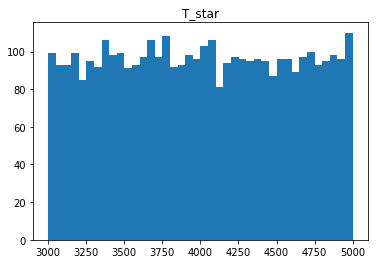

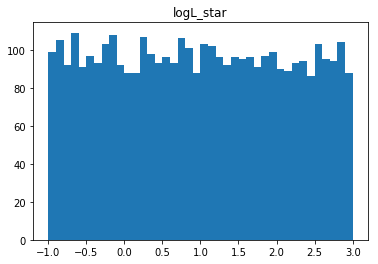

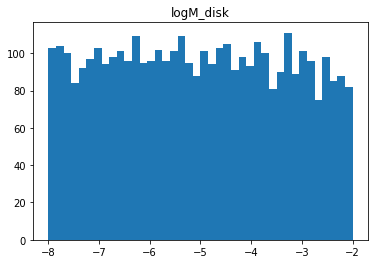

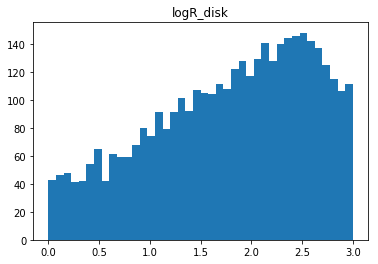

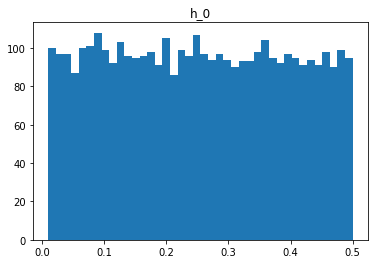

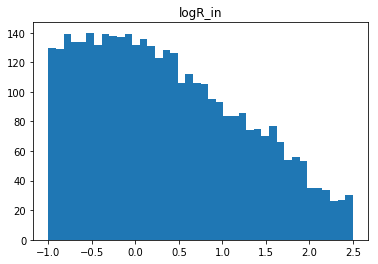

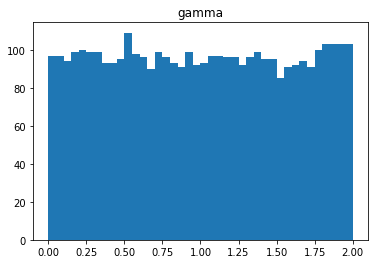

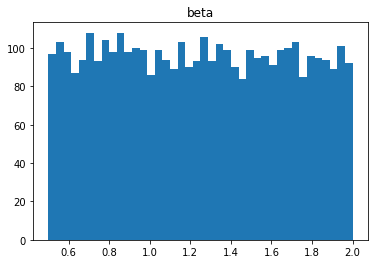

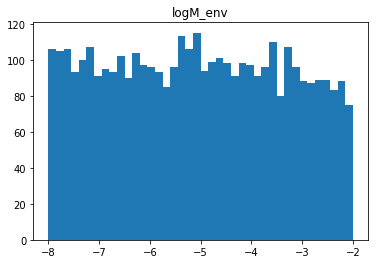

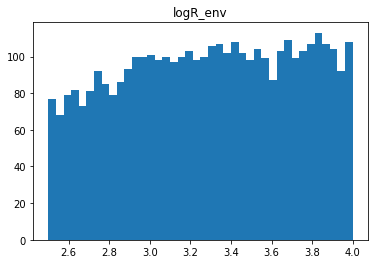

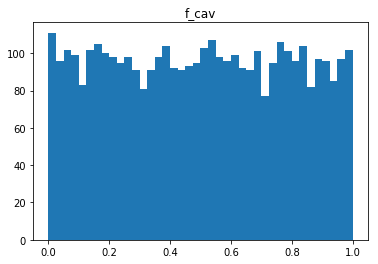

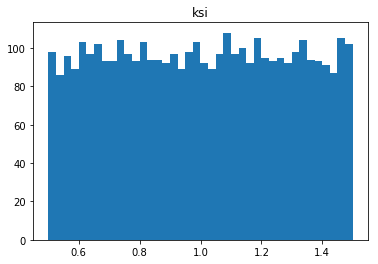

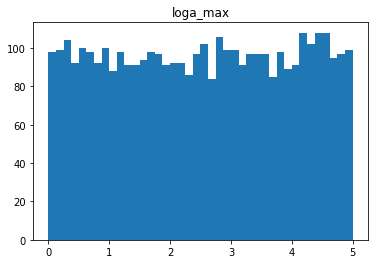

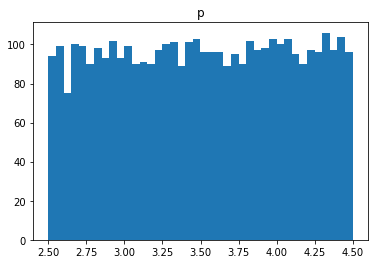

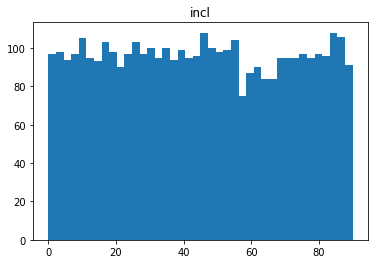

In [5]:
# param distribution histograms

param_names = ["T_star","logL_star","logM_disk","logR_disk","h_0","logR_in",\
          "gamma","beta","logM_env","logR_env","f_cav","ksi","loga_max","p","incl"]

for i in range(len(params)):
    plt.hist(params[i],bins=40)
    plt.title(param_names[i])
    plt.show()

In [ ]:
pdf = PdfPages("../visualization/paramdist1.pdf")
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,12))

for coeffindex in range(6):
    ax[coeffindex//2][coeffindex%2].hist(params[coeffindex],bins=30)
    ax[coeffindex//2][coeffindex%2].set_title(param_names[coeffindex],fontsize=8)
   
plt.subplots_adjust(hspace=0.7)
plt.show()

# Now save the figure.
pdf.savefig(fig)
plt.clf()

# Close the pdf.
pdf.close()

pdf = PdfPages("../visualization/paramdist2.pdf")
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,12))

for coeffindex in range(6,12):
    ax[(coeffindex-12)//2][(coeffindex-12)%2].hist(params[coeffindex],bins=30)
    ax[(coeffindex-12)//2][(coeffindex-12)%2].set_title(param_names[coeffindex],fontsize=8)
    
plt.subplots_adjust(hspace=0.7)
plt.show()

# Now save the figure.
pdf.savefig(fig)
plt.clf()

# Close the pdf.
pdf.close()

pdf = PdfPages("../visualization/paramdist3.pdf")
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(5,12))

for coeffindex in range(12,15):
    ax[(coeffindex-12)].hist(params[coeffindex],bins=30)
    ax[(coeffindex-12)].set_title(param_names[coeffindex],fontsize=8)
   
plt.subplots_adjust(hspace=0.7)
plt.show()

# Now save the figure.
pdf.savefig(fig)
plt.clf()

# Close the pdf.
pdf.close()